# Bootstrapping

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

coffee_rating = pd.read_feather("datasets/coffee_ratings_full (1).feather")

testingCVar = 3

#### What is Bootstraping
The opposite of sampling from a population

*Sampling* going from a population to a smaller sample  

*Bootstraping* building up a theoretical population from the sample

Boostraping use case:  
    - Develop understanding of sampling variability using a single sample


##### Bootstrapping process
1. Make a resample of the same size as the original sample
2. Calculate the statistics of interest for this bootstrap sample
3. Repeat steps 1 and 2 many times

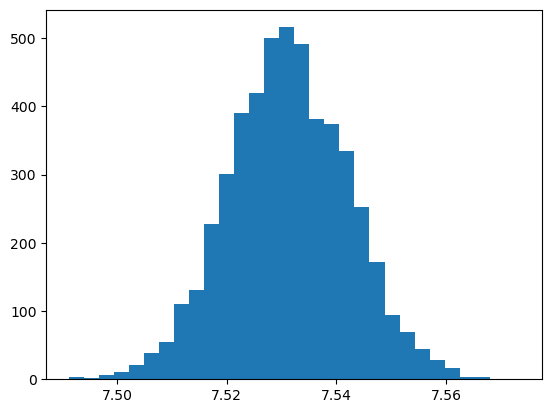

In [139]:
coffee_sample = coffee_rating.sample(1000)

mean_flavors_5000 = []

for i in range(5000):
    mean_flavors_5000.append(
        np.mean(coffee_sample.sample(frac=1, replace=True)["flavor"])
    )

plt.hist(mean_flavors_5000, bins=30)
plt.show()

#### Comparing sampling and boostrap distributions

In [140]:
bootstrap_distn = mean_flavors_5000

print(coffee_sample["flavor"].mean())
print(np.mean(bootstrap_distn))

7.531479999999999
7.5312037940000005


In [141]:
print(coffee_sample["flavor"].std(ddof=0))
print(np.std(bootstrap_distn, ddof=1))

0.33951378410898003
0.010964598629689366


#### Spotify

In [151]:
spotify_pop = pd.read_feather("datasets/spotify_2000_2020.feather")
spotify_sample = spotify_pop.sample(n=5000)

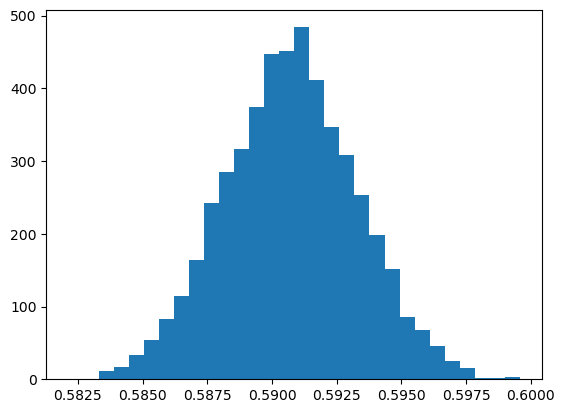

In [143]:
# Generate 1 bootstrap resample
spotify_1_resample = spotify_sample.sample(frac=1, replace=True)

# Replicate this 1000 times
mean_danceability_5000 = []
for i in range(5000):
    mean_danceability_5000.append(
        np.mean(spotify_sample.sample(frac=1, replace=True)["danceability"])
    )

# Draw a histogram of the resample means
plt.hist(mean_danceability_5000, bins=30)
plt.show()

In [161]:
# Generate a sampling distribution of 5000
mean_popularity_5000_samp = []
for i in range(5000):
    mean_popularity_5000_samp.append(
        np.mean(spotify_sample.sample(n=2500)["popularity"])
    )

# Print the sampling distribution results
print(mean_popularity_5000_samp)

[54.8876, 55.148, 54.868, 54.8856, 54.664, 54.9244, 54.9416, 54.8068, 54.8068, 54.7876, 54.8588, 55.2032, 54.9048, 54.94, 54.8016, 55.0336, 54.7392, 55.2256, 54.75, 54.764, 54.846, 54.6584, 54.908, 54.8128, 54.6728, 54.9224, 55.1124, 55.264, 54.9552, 54.6852, 55.1084, 54.8204, 54.9596, 54.7452, 54.668, 55.036, 54.94, 54.9916, 55.044, 54.814, 54.9944, 54.7332, 55.0032, 54.684, 54.8888, 54.9616, 54.8896, 54.9868, 54.94, 54.7648, 54.9576, 55.0972, 54.9788, 54.6664, 54.8816, 54.9228, 54.6872, 54.9828, 54.9444, 54.8472, 54.7948, 55.1636, 54.9684, 54.9696, 54.98, 55.1516, 55.1252, 55.054, 54.8396, 54.97, 54.7792, 54.9888, 55.1556, 54.9608, 54.944, 54.6132, 54.8596, 54.8972, 54.6816, 54.8904, 54.7912, 54.8376, 55.3876, 54.5336, 55.0188, 54.9232, 54.9928, 54.9432, 54.7264, 54.9152, 54.8808, 55.0944, 54.8056, 54.8272, 55.004, 54.9812, 54.8948, 54.9288, 55.0452, 54.9036, 55.192, 54.9672, 54.7868, 55.1204, 54.8968, 54.8832, 54.9596, 54.836, 54.8076, 55.1528, 54.8384, 54.7668, 54.8436, 55.1412, 55

In [154]:
# Generate a sampling distribution of 5000 replicates
mean_popularity_5000_boots = []
for i in range(5000):
    mean_popularity_5000_boots.append(
        # Sample 500 rows and calculate the mean popularity
        np.mean(spotify_sample.sample(frac=1, replace=True)["popularity"])
    )

# Print the sampling distribution results
print(mean_popularity_5000_boots)

[54.8868, 54.846, 55.0764, 54.6956, 55.0174, 54.9854, 54.984, 54.8644, 54.8936, 54.8704, 54.8834, 54.8116, 55.2158, 54.712, 54.8612, 54.7558, 54.9702, 54.786, 54.9692, 55.0242, 55.06, 54.949, 54.937, 55.0034, 54.8284, 54.8216, 54.8976, 55.155, 54.9516, 55.0668, 54.9256, 54.995, 55.0456, 55.355, 54.896, 54.6408, 55.0304, 54.9446, 54.8806, 54.9124, 54.8604, 55.1874, 54.912, 54.8792, 54.909, 54.9772, 54.9872, 55.1302, 54.95, 54.7544, 54.798, 54.9446, 55.0434, 54.9344, 54.7226, 54.8372, 55.0814, 54.7962, 55.1932, 54.568, 55.001, 54.8126, 54.959, 54.8606, 54.8066, 54.6726, 54.9926, 55.0542, 54.8442, 54.8286, 54.8362, 55.0458, 54.8432, 54.8974, 55.0716, 55.1028, 55.0414, 55.0106, 54.855, 54.9544, 55.1832, 54.7916, 54.7284, 55.18, 54.9394, 54.8604, 54.709, 54.807, 55.0426, 54.8428, 55.0148, 55.0292, 54.9136, 54.8896, 54.7106, 55.0082, 54.8696, 54.9678, 54.7648, 54.9746, 54.6314, 54.9512, 54.8254, 55.2038, 54.8718, 55.1982, 55.0868, 54.9746, 55.1246, 54.636, 54.7844, 54.9062, 55.1278, 54.8204,

In [162]:
# Calculate the population mean popularity
pop_mean = spotify_pop["popularity"].mean()

# Calculate the original sample mean popularity
samp_mean = spotify_sample["popularity"].mean()

# Calculate the sampling dist'n estimate of mean popularity
samp_distn_mean = np.mean(mean_popularity_5000_samp)

# Calculate the bootstrap dist'n estimate of mean popularity
boot_distn_mean = np.mean(mean_popularity_5000_boots)

# Print the means
print([pop_mean, samp_mean, samp_distn_mean, boot_distn_mean])

[54.837142308430955, 54.9406, 54.941564559999996, 54.94456848000001]


In [163]:
# Calculate the population std dev popularity
pop_sd = spotify_pop["popularity"].std(ddof=0)

# Calculate the original sample std dev popularity
samp_sd = spotify_sample["popularity"].std()

# Calculate the sampling dist'n estimate of std dev popularity
samp_distn_sd = np.std(mean_popularity_5000_samp, ddof=1) * np.sqrt(5000)

# Calculate the bootstrap dist'n estimate of std dev popularity
boot_distn_sd = np.std(mean_popularity_5000_boots, ddof=1) * np.sqrt(5000)

# Print the standard deviations
print([pop_sd, samp_sd, samp_distn_sd, boot_distn_sd])

[10.880065274257204, 10.748161528152044, 10.689600719986814, 10.516074657289552]
